<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week3%20-%20EDA%20and%20Visualization/walkthroughs/Introduction_to_Data_Analysis_through_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Introduction to Data Analysis through examples

## Setup and preliminaries

In [0]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

We type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [0]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## Restaurant inspection results in NYC

We will use a dataset with restaurant inspection results in NYC which is stored at `/data/restaurants.csv`.


### Reading a CSV file
We can directly load csv file from the url with pandas

In [0]:
import pandas as pd
restaurants = pd.read_csv('https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD', 
                          encoding='utf_8', 
                          dtype = 'unicode',
                          parse_dates = True,
                          infer_datetime_format = True,
                          low_memory=False)

Alternatively, you can first download it and then load it from a local directory in your computer(in case you are not using colab)

Let's take a look at the first 5 rows of the dataframe

In [0]:
restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,40372631,YANKEE JZ PIZZA,Bronx,1599,WESTCHESTER AVENUE,10472,7183284349,Pizza,03/06/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,17,B,03/06/2018,03/02/2020,Cycle Inspection / Re-inspection,40.829178325164,-73.87570682252,209,18,005400,2025317,2037760001,BX08
1,40868400,ARIANA KEBAB HOUSE,Manhattan,787,9 AVENUE,10019,2122622323,Afghan,08/20/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,5,A,08/20/2019,03/02/2020,Cycle Inspection / Initial Inspection,40.764993098016,-73.987855987299,104,03,013300,1082418,1010620032,MN15
2,50064218,TAP NYC,Manhattan,267,COLUMBUS AVE,10023,9175957012,Café/Coffee/Tea,10/10/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,N,20,NaN,NaN,03/02/2020,Cycle Inspection / Initial Inspection,40.77771642487,-73.978556145725,107,06,015700,1028631,1011250001,MN14
3,40571528,GEORGES RESTAURANT,Brooklyn,5701,5 AVENUE,11220,7184391403,American,06/08/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,7,A,06/08/2017,03/02/2020,Cycle Inspection / Initial Inspection,40.641088397474,-74.014474306129,307,38,010200,3015722,3008480008,BK34
4,50071397,Q & I BAKERY,Brooklyn,6516,11TH AVE,11219,7182382638,Bakery,04/15/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,22,NaN,NaN,03/02/2020,Cycle Inspection / Initial Inspection,40.628482363808,-74.006099166977,310,38,021200,3142182,3057510045,BK30


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [0]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
count,401346,400983,401346,401085,401345,395860,401329,401346,401346,400038,395754,392367,392367,384517,203231,200632,401346,400038,400932,400932,395447,395459,395459,393708,400932,395447
unique,27253,21595,6,7301,3235,227,25499,84,1341,5,104,89,2,136,7,1271,1,31,22654,22654,69,51,1184,19697,19398,193
top,50018552,DUNKIN',Manhattan,1,BROADWAY,10003,7185958100,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Y,12,A,06/13/2019,03/02/2020,Cycle Inspection / Initial Inspection,0,0,105,03,006500,4000000,1,MN17
freq,98,4154,158004,2292,14482,10322,274,83759,1308,375202,57211,57211,219195,41893,159952,501,401346,234472,5485,5485,32474,35309,3279,2447,3112,23858


We can also check the data types for each column

In [0]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
Latitude                 object
Longitude                object
Community Board          object
Council District         object
Census Tract             object
BIN                      object
BBL                      object
NTA                      object
dtype: object

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions. We examine how to convert data types below.

### Descriptive Statistics for Numeric Variables


#### Converting Data Types to Numeric

The `object` type is a string. When we want to convert an object to numeric, we can use the `pd.to_numeric` function, as shown below:

In [0]:
restaurants[["SCORE"]].head()

,SCORE
0,17
1,5
2,20
3,7
4,22


In [0]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                  object
Longitude                 object
Community Board           object
Council District          object
Census Tract              object
BIN                       object
BBL                       object
NTA                       object
dtype: object

#### Basic descriptive statistics for numeric variables

And now that SCORE is a numeric variable, we can get more detailed descriptive statistics for the variable using the `.describe()` command:

In [0]:
# For column names without a space, we can also access directly the column as follows:
restaurants.SCORE.describe()

count    384517.000000
mean         20.415511
std          14.837406
min          -1.000000
25%          11.000000
50%          15.000000
75%          26.000000
max         164.000000
Name: SCORE, dtype: float64

And now that SCORE is a numeric variable, we can examine its distribution by using the `hist` command of Pandas, which creates a histogram. (The histogram is also available as `plot.hist`, or `plot(kind='hist'))`.)

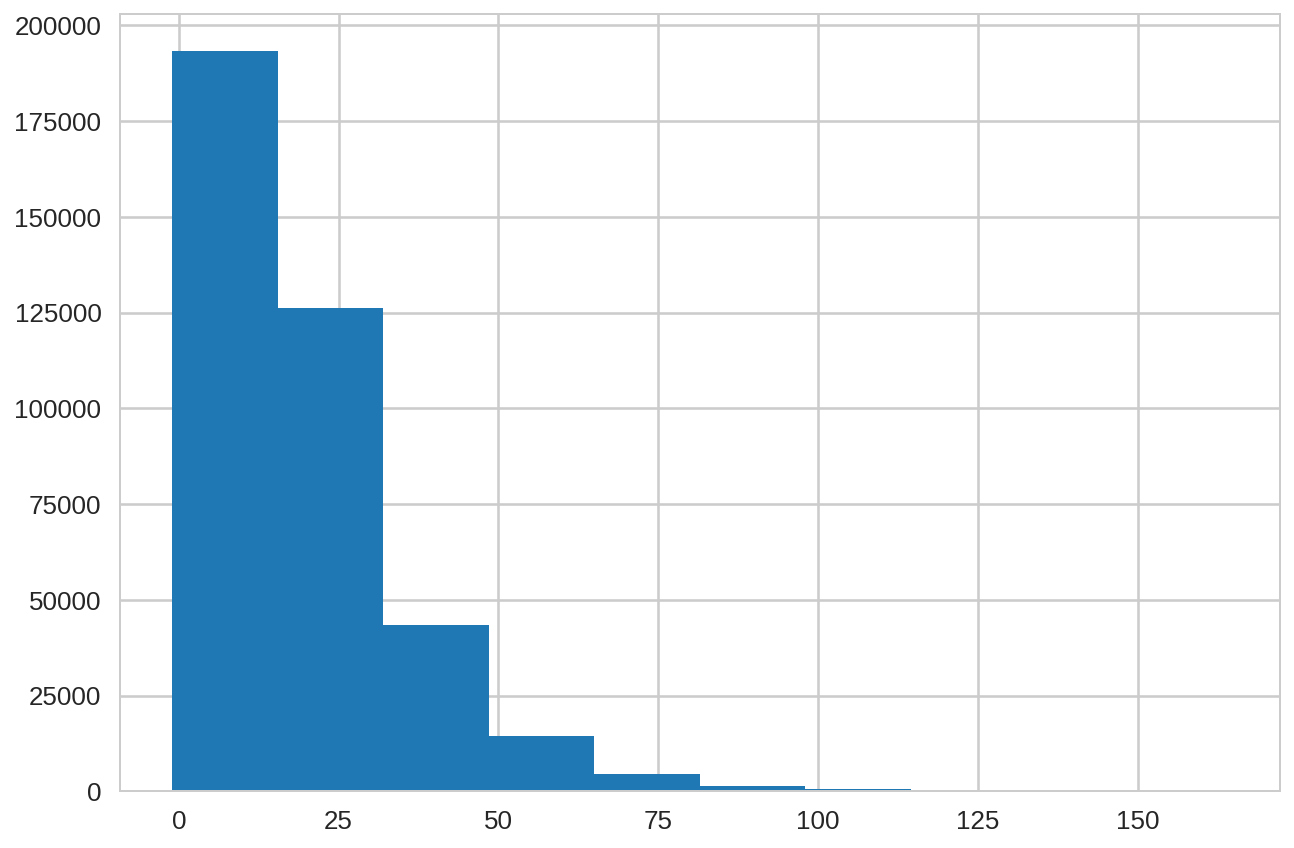

In [0]:
restaurants["SCORE"].hist()

By default, the histogram has ~10 bars in out plot. We can change the resolution of the histogram using the `bins` variable. Larger number of `bins` allow for higher resolution, but if we increase the number too much, many bins end up having very few, or no data points. For example, experiment with changing the balue of bins below, and change the value from 50 to something bigger.

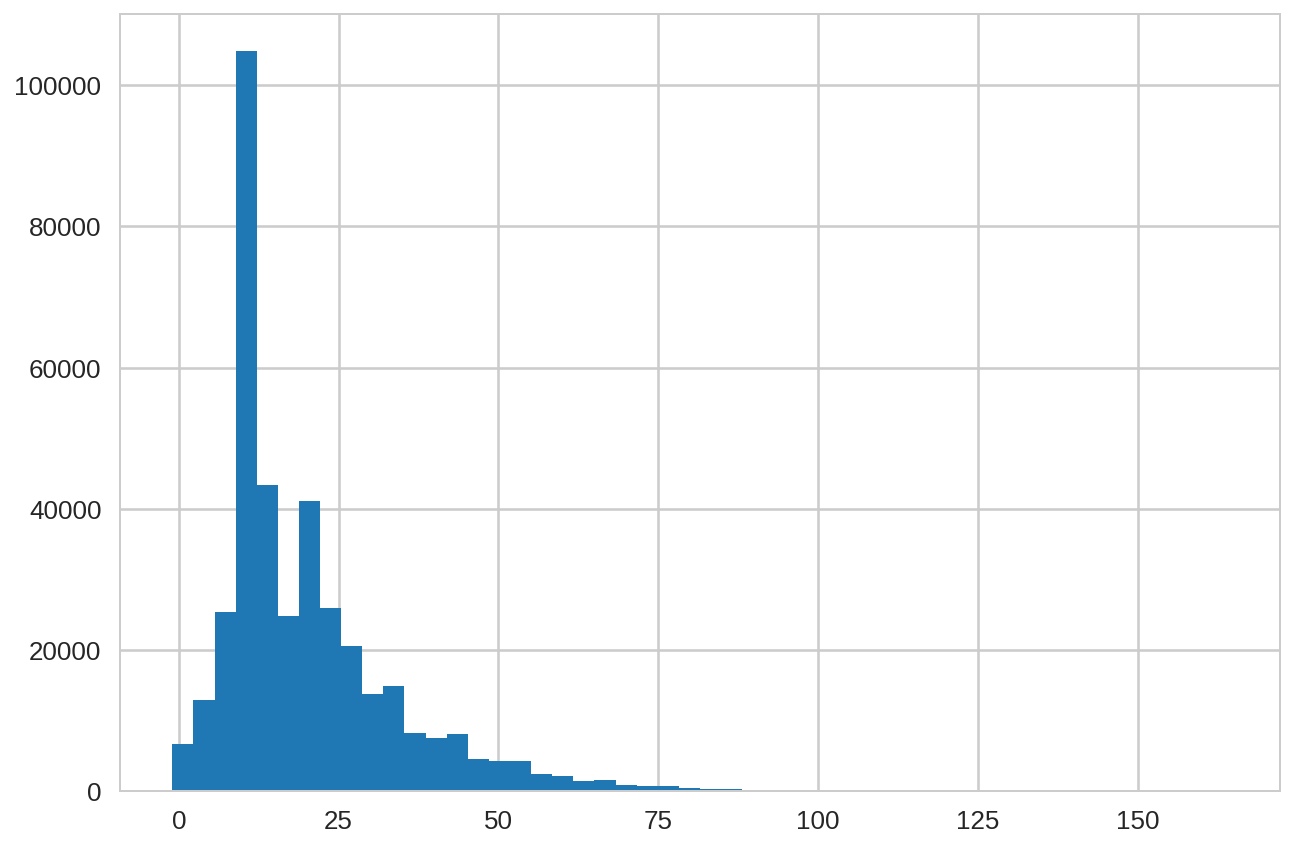

In [0]:
restaurants["SCORE"].hist(bins=50)

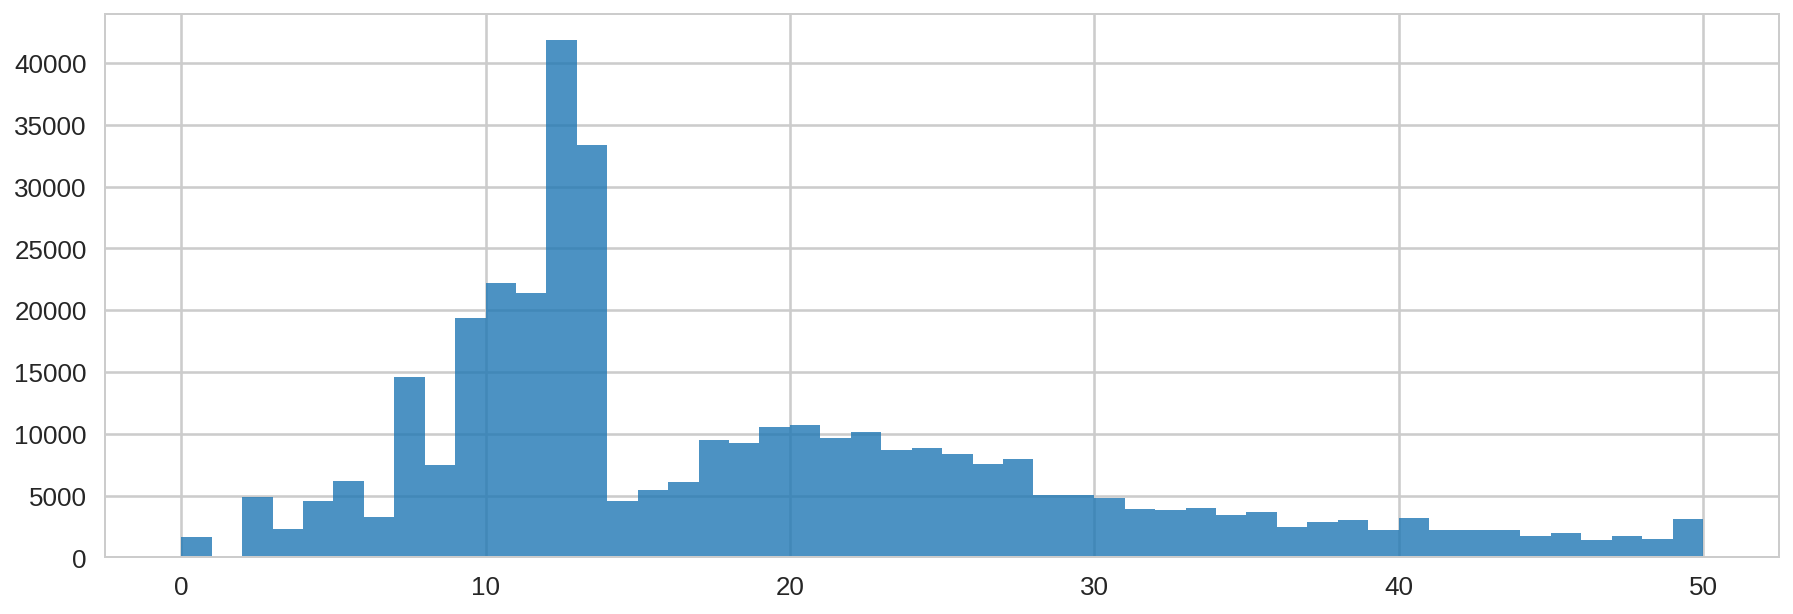

In [0]:
# A quick exposure to various options of the "hist" command 
restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=False,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5), # controls the size of the plot
                          alpha = 0.8 # make the plot 20% transparent
                         )

#### Kernel Density Estimation (KDE)

An alternative to histograms is to use the **kernel density**, which estimates a continuous function, instead of the bucketized counts, which tends to be discontunuous and bumpy. We can access this usind the `.plot(kind='kde')` command:

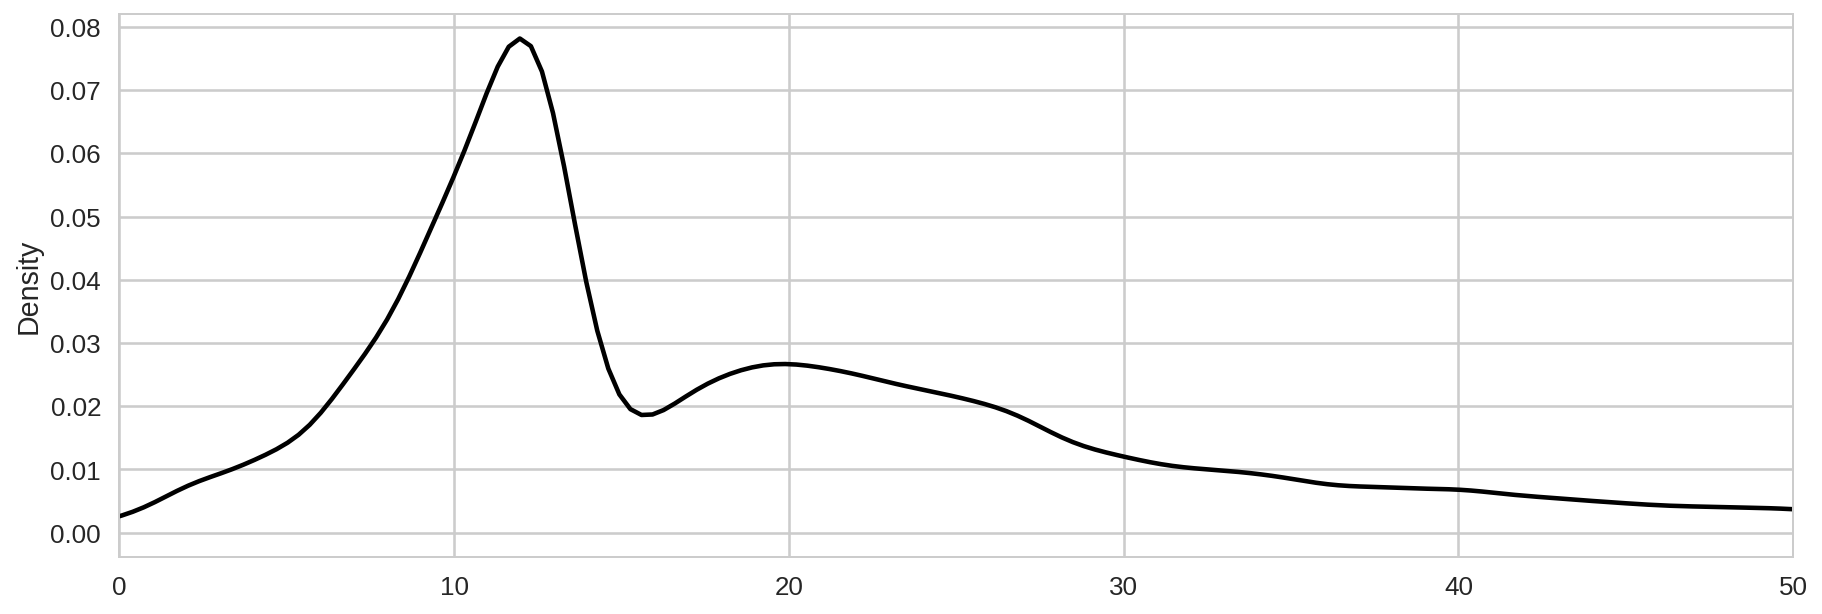

In [0]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
restaurants.SCORE.plot(
    kind='kde', 
    color='Black', 
    xlim=(0,50), 
    figsize=(15,5)
)

### Converting Dates

Now let's convert the dates columns into the appropriate data types. Let's take a look at a few dates.

In [0]:
restaurants["GRADE DATE"].head(10)

0    03/06/2018
1    08/20/2019
2           NaN
3    06/08/2017
4           NaN
5           NaN
6           NaN
7    09/18/2019
8    04/26/2019
9           NaN
Name: GRADE DATE, dtype: object

For that, we need to understand first how to [parse dates using the Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

The relevant entries from the table are:
* `%m` Month as a zero-padded decimal number.
* `%d` 	Day of the month as a zero-padded decimal number.
* `%Y` Year with century as a decimal number.

Now, we can specify how to parse these dates. (In principle, we can let Pandas do this automatically, but it is _much_ faster if we specify it ourselves. It is also much less error-prone.)

In [0]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [0]:
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                         object
Longitude                        object
Community Board                  object
Council District                 object
Census Tract                     object
BIN                              object
BBL                              object


In [0]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

#### Exercise

* Plot a histogram for `INSPECTION DATE`, `GRADE DATE`, `RECORD DATE`. What do you see?
* Try modifying the `bins` parameter. What are the results?
* The `range=(start, finish)` command is often useful, when we want to focus on a particular part of the dataset. Try using that for  `INSPECTION DATE` to limit the dates to be between 1/1/2014 and 05/31/2018.

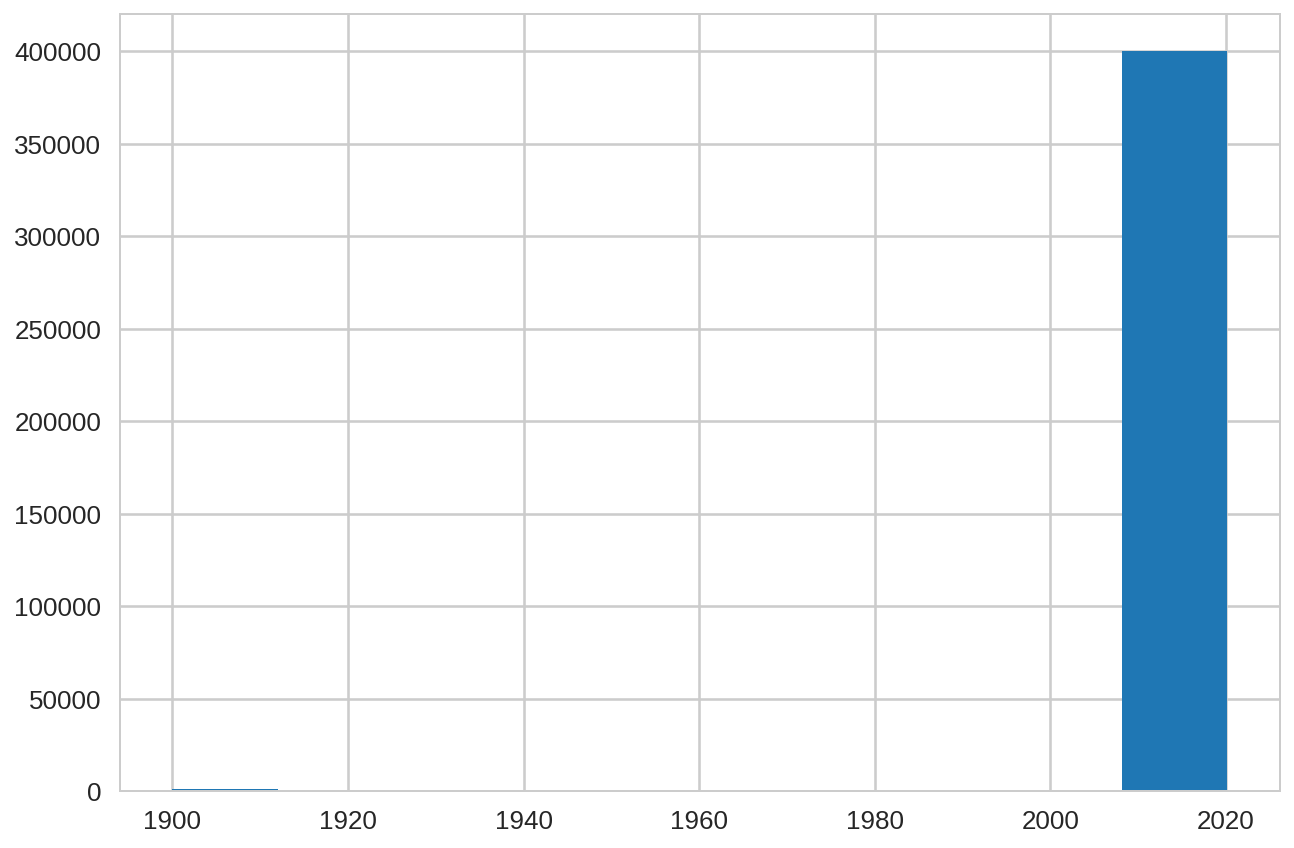

In [0]:
# Not very appealing
restaurants['INSPECTION DATE'].hist()

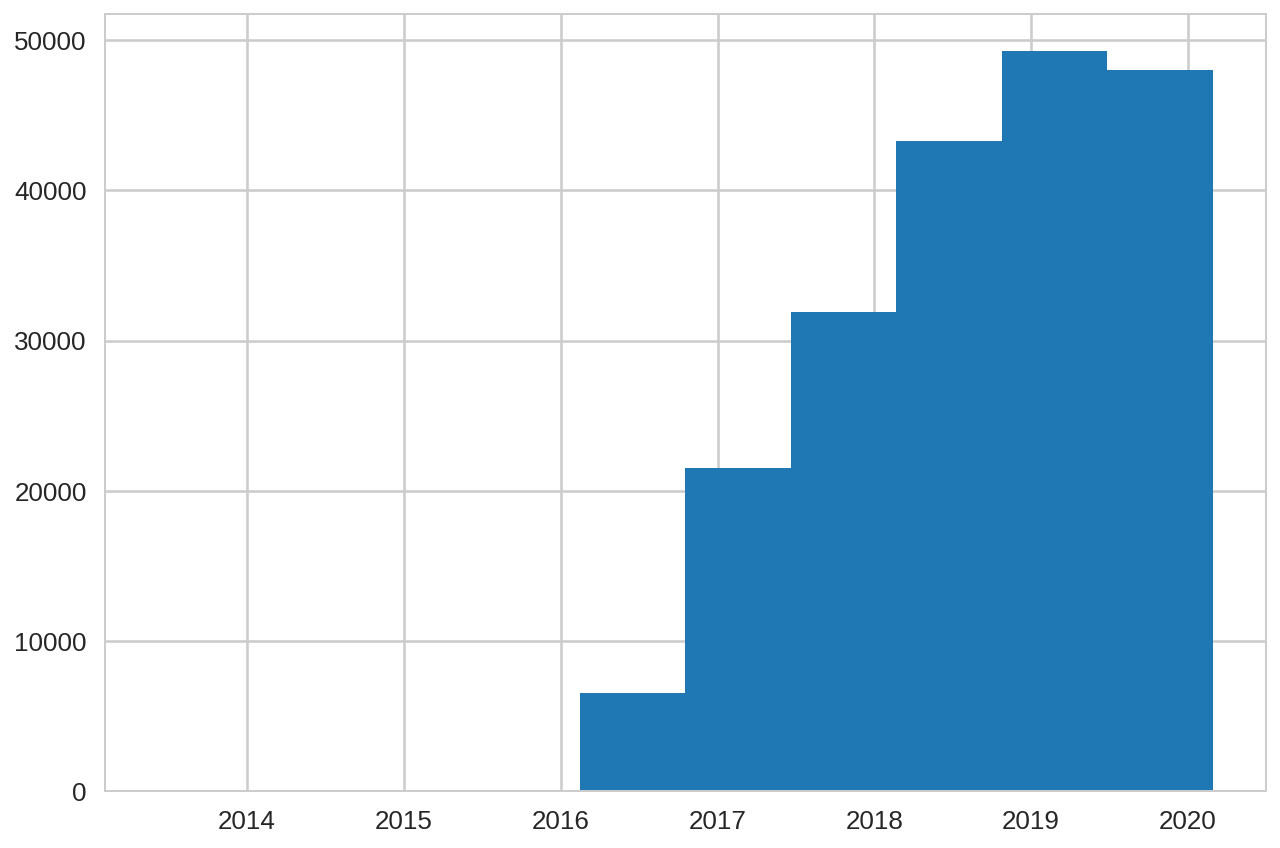

In [0]:
restaurants['GRADE DATE'].hist()

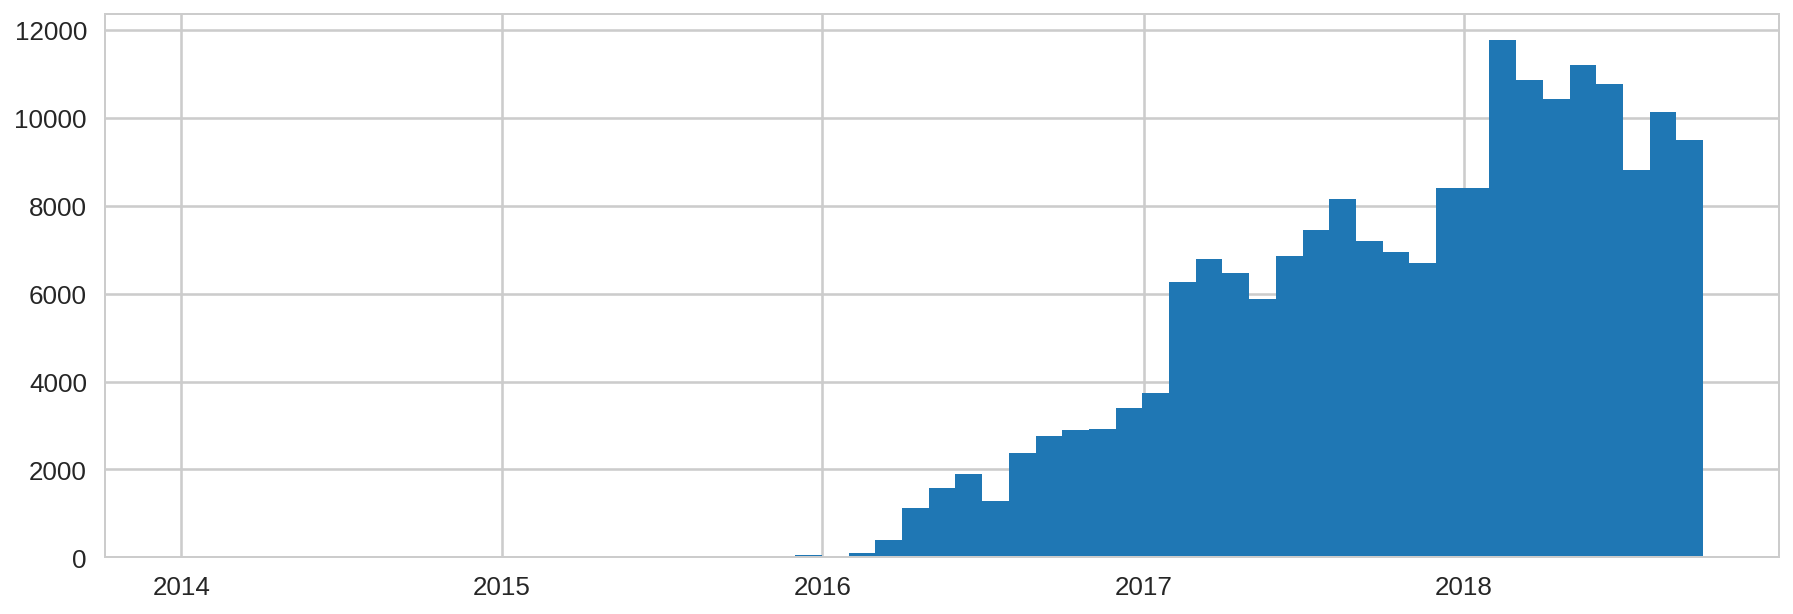

In [0]:
restaurants['INSPECTION DATE'].hist(
    range = ('1/1/2014','9/30/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 57, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

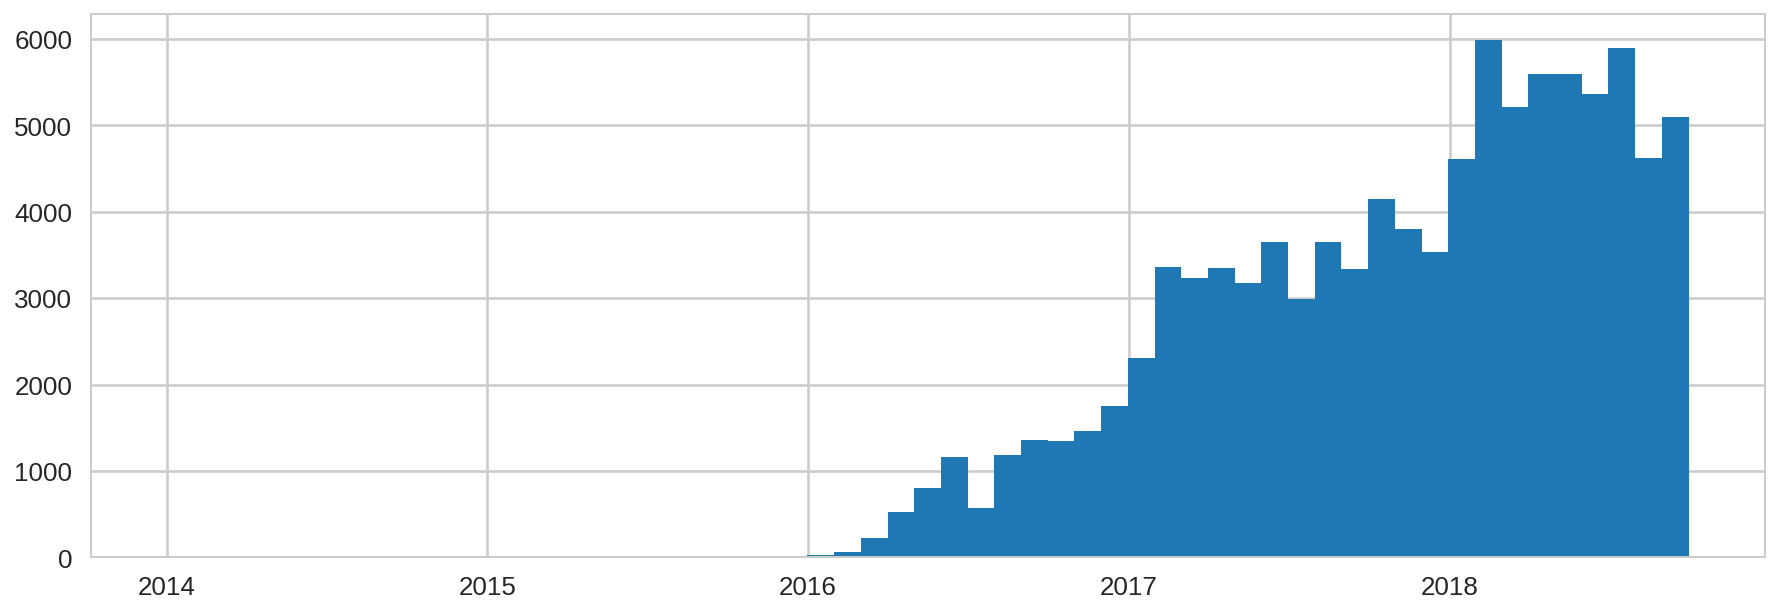

In [0]:
restaurants['GRADE DATE'].hist(
    range = ('1/1/2014','9/30/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 57, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

### Categorical Variables

This is less important, but sometimes we want to specify variables to be "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

In [0]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                         object
Longitude                        object
Community Board                  object
Council District                 object
Census Tract                     object
BIN                              object
BBL                              object


### Analyzing the content of the columns

We can also get quick statistics about the common values that appear in each column:

In [0]:
restaurants["DBA"].value_counts()[:10] 

DUNKIN'                                  4154
SUBWAY                                   2941
STARBUCKS                                2129
MCDONALD'S                               1944
KENNEDY FRIED CHICKEN                    1338
DUNKIN', BASKIN ROBBINS                  1171
CROWN FRIED CHICKEN                      1144
BURGER KING                              1058
POPEYES                                   958
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     784
Name: DBA, dtype: int64

In [0]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5]

American                                                            83759
Chinese                                                             42191
Café/Coffee/Tea                                                     19684
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    17655
Pizza                                                               17462
Name: CUISINE DESCRIPTION, dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

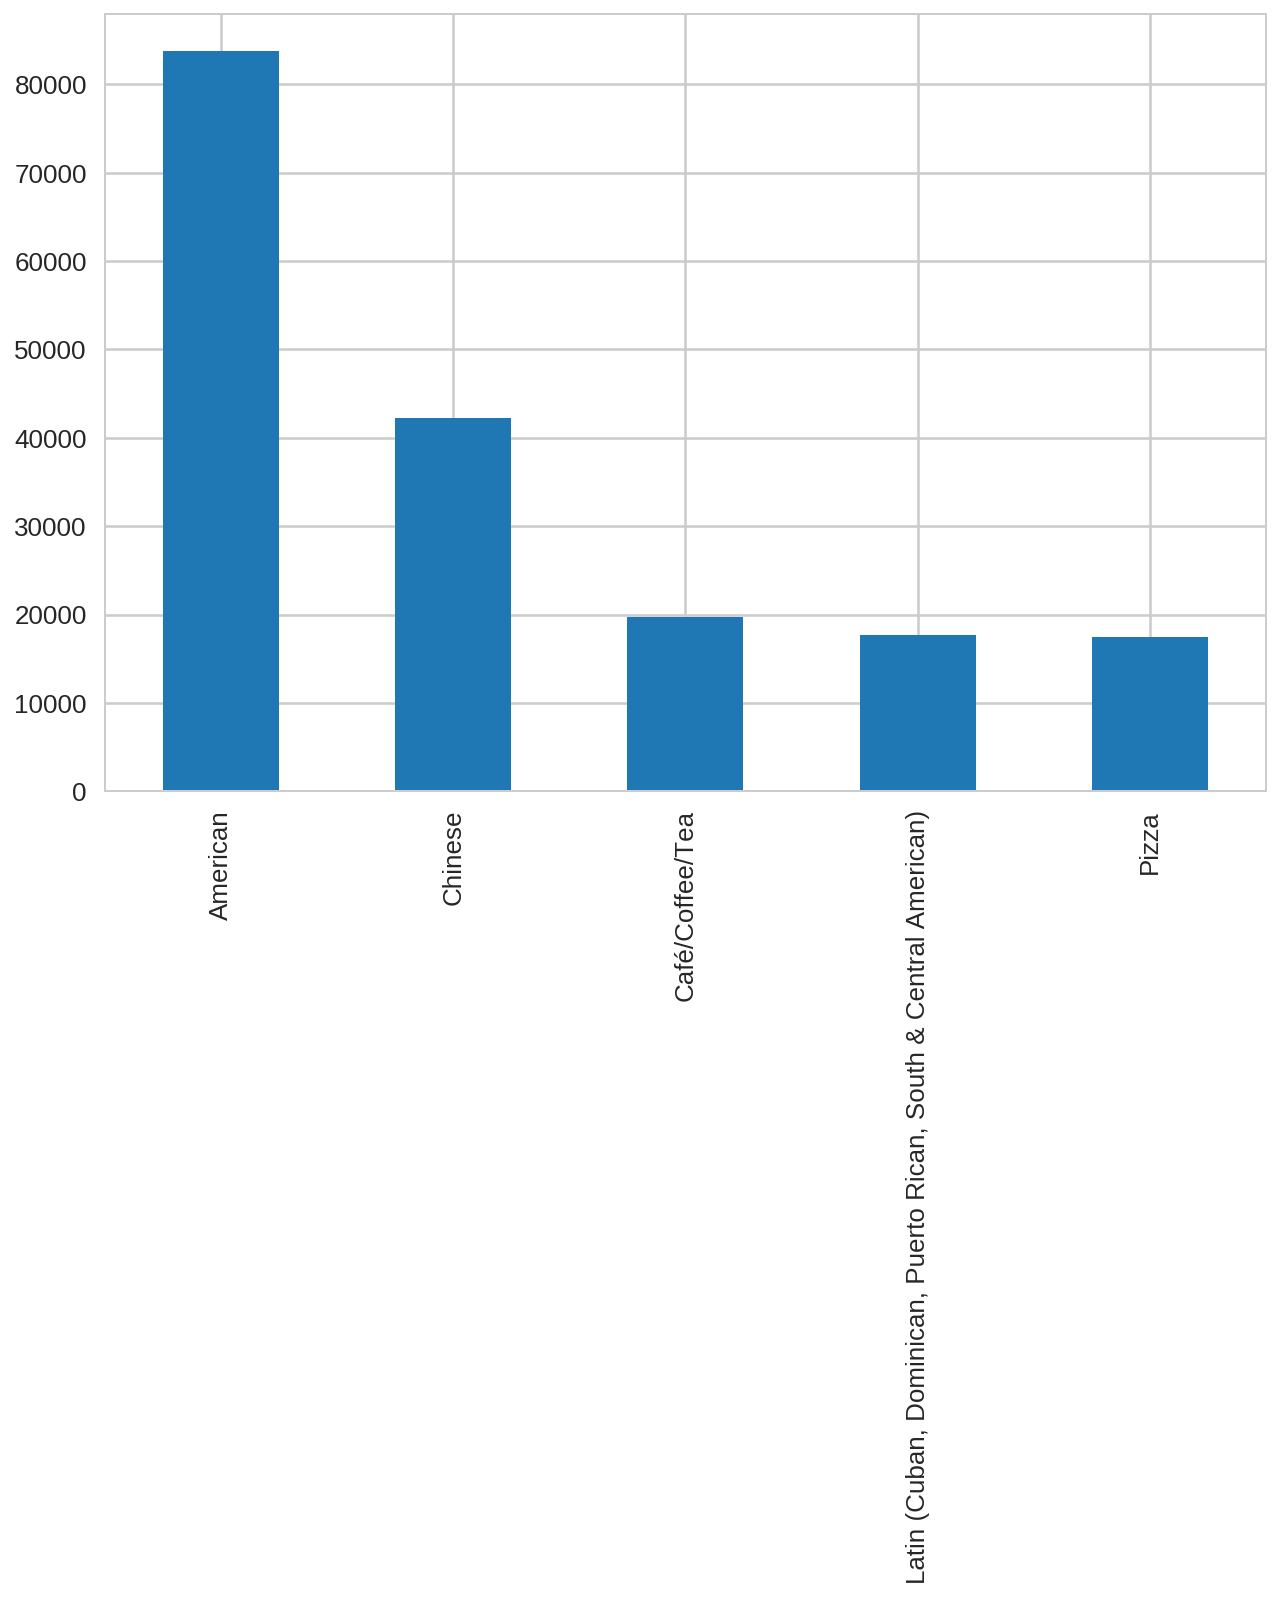

In [0]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

In [0]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

American                                                            83759
Chinese                                                             42191
Café/Coffee/Tea                                                     19684
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    17655
Pizza                                                               17462
                                                                    ...  
Iranian                                                                69
Czech                                                                  43
Nuts/Confectionary                                                     43
Chilean                                                                34
Basque                                                                  7
Name: CUISINE DESCRIPTION, Length: 84, dtype: int64

Hm, that does not look nice. Let's shorten the name of the cuisine for the _"Latin (Cuban, Dominican, Puerto Rican, South & Central American)"_ and replace it with _"Latin American"_. We will use the `replace` command in Pandas:

In [0]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
    value = 'Latin American',
    inplace=True
)

In [0]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea',
    value = 'Cafe/Coffee/Tea',
    inplace=True
)


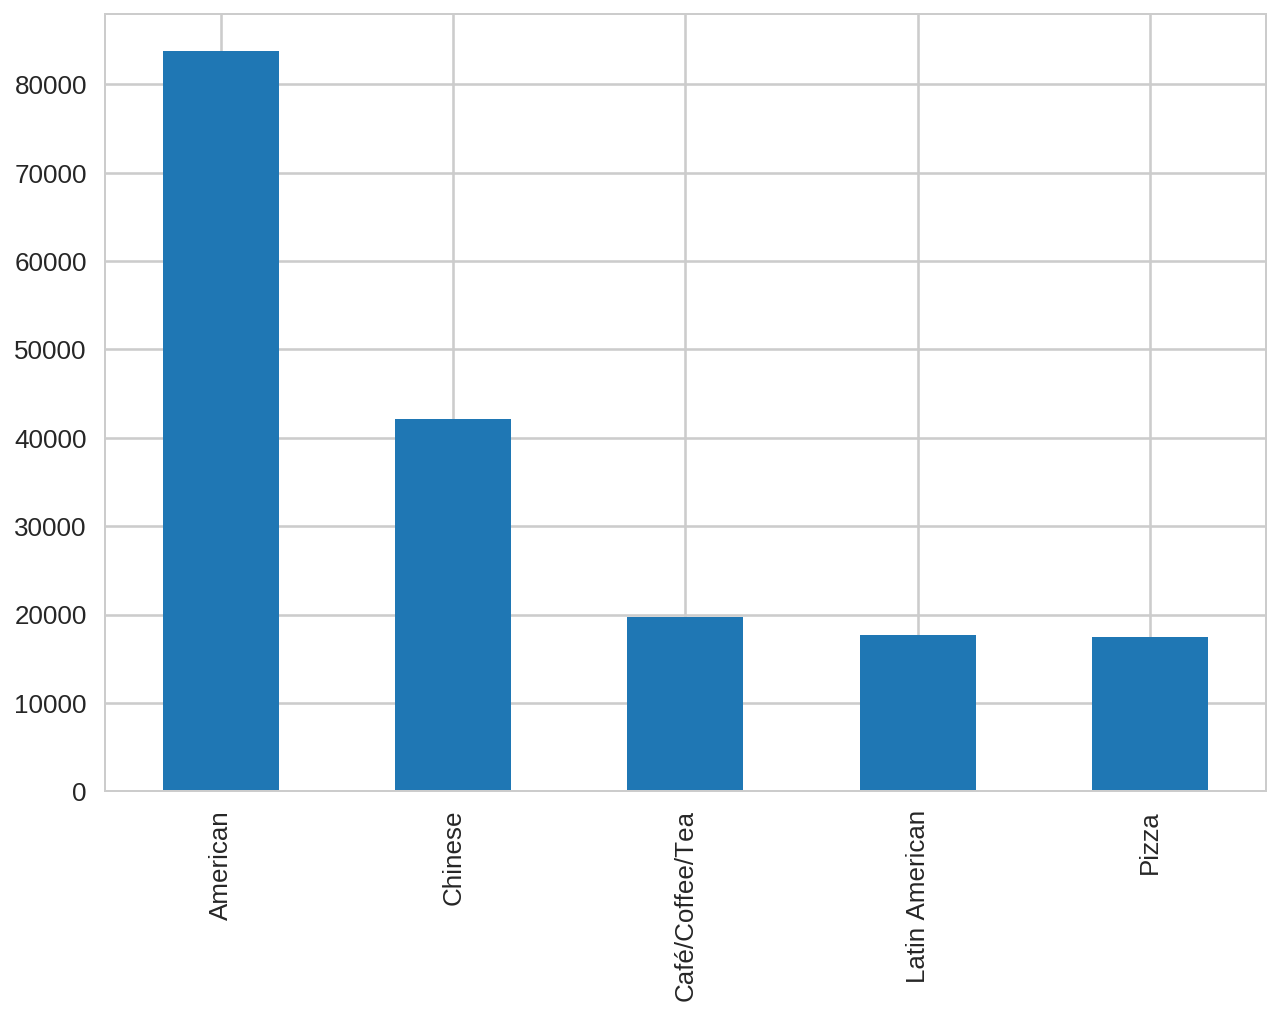

In [0]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

Let's do the similar histogram for the violation codes

In [0]:
restaurants["VIOLATION CODE"].head(5)

0    10F
1    10B
2    08C
3    10F
4    06C
Name: VIOLATION CODE, dtype: category
Categories (104, object): [02A, 02B, 02C, 02D, ..., 22C, 22E, 22F, 22G]

In [0]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    57211
08A    44591
04L    29860
06D    27464
06C    24428
10B    23514
02G    23013
04N    21154
02B    20533
04M     8886
Name: VIOLATION CODE, dtype: int64

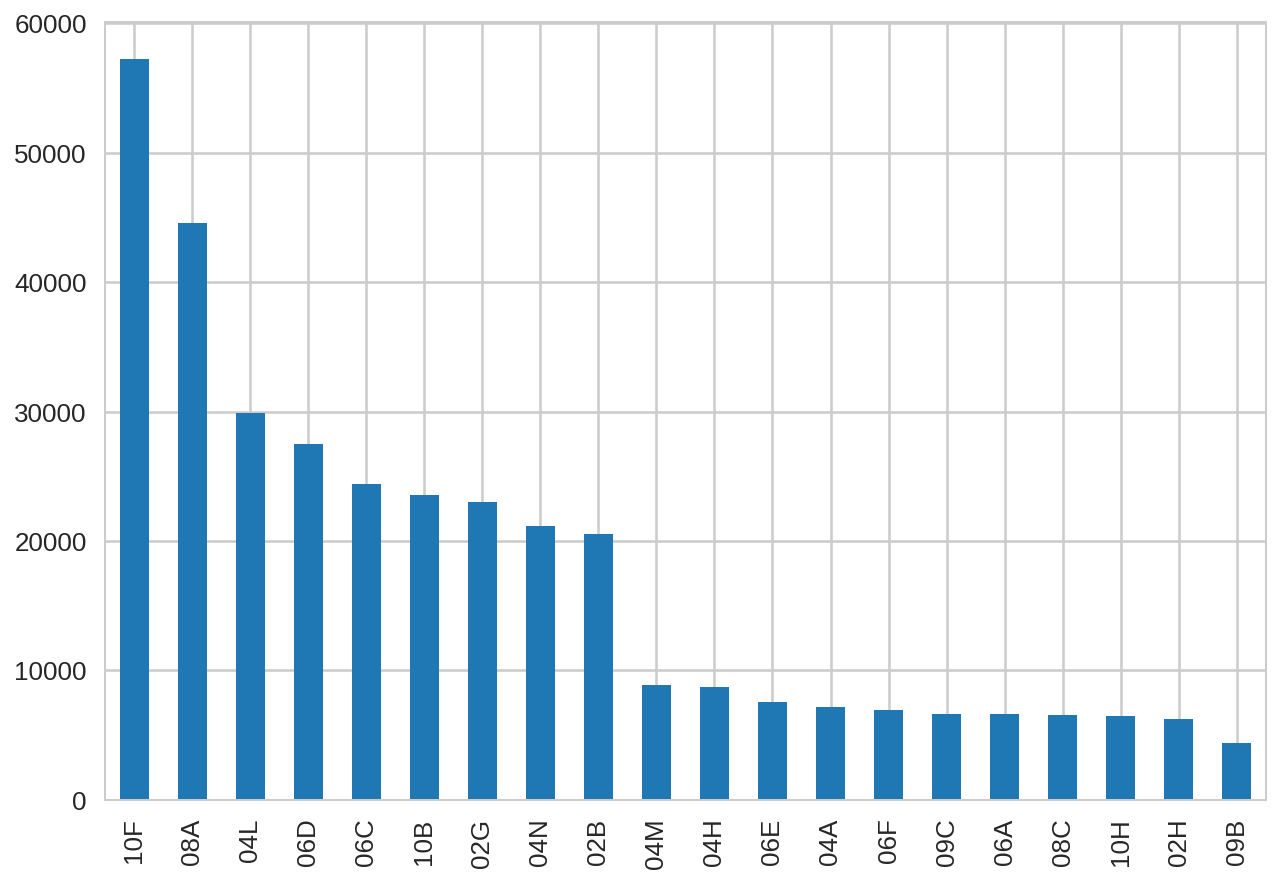

In [0]:
violation_counts[0:20].plot(kind='bar')

#### Exercise

* Create a plot showing the number of inspections that happen across **boroughs**. Use the `BORO` column and the `value_counts()` function.

In [0]:
restaurants['BORO'].value_counts()

Manhattan        158004
Brooklyn         102014
Queens            91633
Bronx             36268
Staten Island     13349
0                    78
Name: BORO, dtype: int64

In [0]:
# Same as above; works only for attribute names without spaces
restaurants.BORO.value_counts()

Manhattan        158004
Brooklyn         102014
Queens            91633
Bronx             36268
Staten Island     13349
0                    78
Name: BORO, dtype: int64

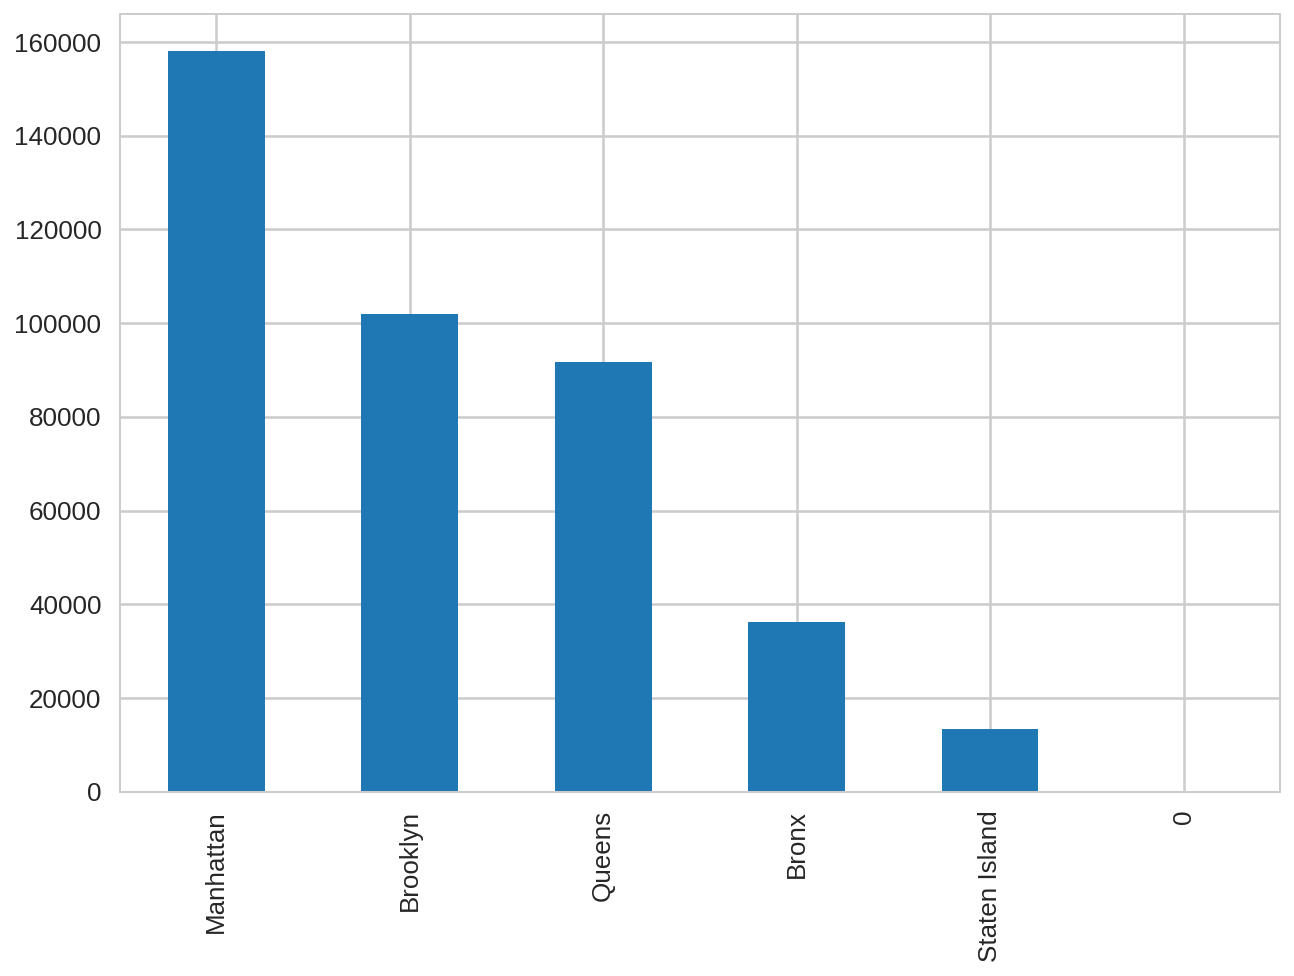

In [0]:
restaurants['BORO'].value_counts().plot(kind='bar')

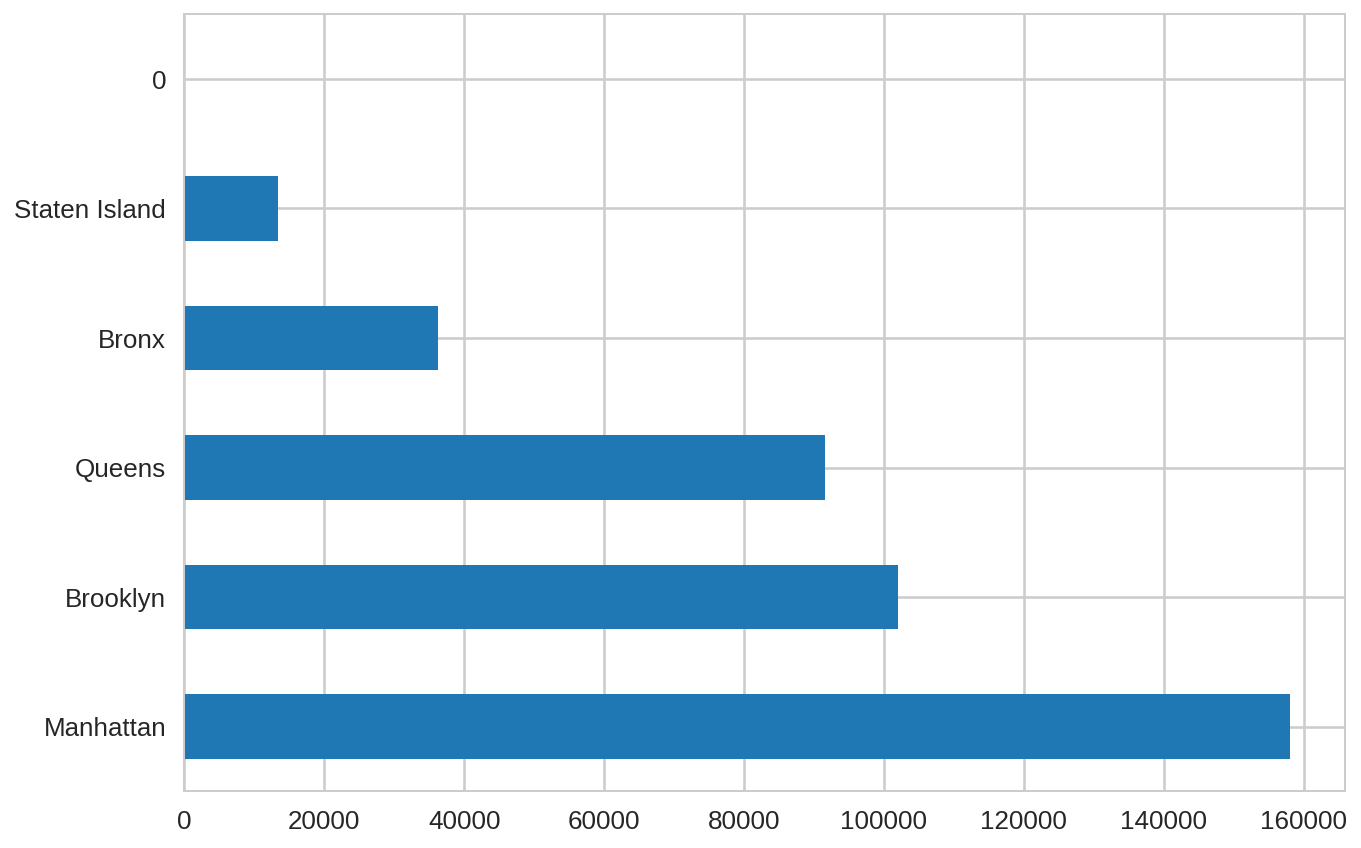

In [0]:
restaurants['BORO'].value_counts().plot(kind='barh')

### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [0]:
restaurants[ ["DBA", "GRADE", "GRADE DATE"] ].head()

,DBA,GRADE,GRADE DATE
0,YANKEE JZ PIZZA,B,2018-03-06
1,ARIANA KEBAB HOUSE,A,2019-08-20
2,TAP NYC,NaN,NaT
3,GEORGES RESTAURANT,A,2017-06-08
4,Q & I BAKERY,NaN,NaT


In [0]:
columns = ["GRADE DATE","VIOLATION CODE", "DBA", "SCORE"]
restaurants[ columns ].head()

,GRADE DATE,VIOLATION CODE,DBA,SCORE
0,2018-03-06,10F,YANKEE JZ PIZZA,17.0
1,2019-08-20,10B,ARIANA KEBAB HOUSE,5.0
2,NaT,08C,TAP NYC,20.0
3,2017-06-08,10F,GEORGES RESTAURANT,7.0
4,NaT,06C,Q & I BAKERY,22.0


### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [0]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice.head()

0    False
1    False
2    False
3    False
4    False
Name: VIOLATION CODE, dtype: bool

In [0]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
18,50033001,RONDEL,Brooklyn,2006,CONEY ISLAND AVE,11223,3473719276,Eastern European,2018-02-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,25.0,NaN,NaT,2020-03-02,Cycle Inspection / Initial Inspection,40.608485987867,-73.962101454312,315,44,042000,3329198,3066420034,BK25
35,41284555,JIMMY'S DINER,Brooklyn,577,UNION AVENUE,11211,7182187174,American,2018-08-07,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,27.0,NaN,NaT,2020-03-02,Cycle Inspection / Initial Inspection,40.717669569068,-73.952226950759,301,33,051900,3061639,3023000018,BK73
98,50039681,YUAN BAO 50,Brooklyn,4924,8TH AVE,11220,7184371888,Chinese,2017-04-10,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,45.0,NaN,NaT,2020-03-02,Cycle Inspection / Initial Inspection,40.641492746629,-74.003322228373,307,38,010800,3013117,3007860047,BK34
112,50073755,LITTLE GIO'S PIZZA,Manhattan,26,1ST AVE,10009,6469619801,Pizza,2019-11-26,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,66.0,NaN,NaT,2020-03-02,Cycle Inspection / Initial Inspection,40.723791492614,-73.988040303961,103,02,003002,1005735,1004290009,MN22
117,50060455,FOUR & TWENTY BLACKBIRDS,Brooklyn,634,DEAN ST,11238,3473505110,Café/Coffee/Tea,2019-05-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,13.0,A,2019-05-09,2020-03-02,Cycle Inspection / Initial Inspection,40.680445313491,-73.969260381268,308,35,016300,3027866,3011370035,BK64


In [0]:
# List the most frequent DBA values in the data of restaurants that have mice
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   255
DUNKIN'                                  147
KENNEDY FRIED CHICKEN                    126
CROWN FRIED CHICKEN                      119
STARBUCKS                                 85
MCDONALD'S                                74
POPEYES                                   71
BURGER KING                               71
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     66
DUNKIN', BASKIN ROBBINS                   56
KFC                                       39
LE PAIN QUOTIDIEN                         37
DOMINO'S                                  37
LITTLE CAESARS                            35
AMC THEATRES                              31
CARVEL ICE CREAM                          29
BAREBURGER                                22
PAPA JOHN'S                               22
VIVI BUBBLE TEA                           22
EMPANADAS MONUMENTAL                      21
Name: DBA, dtype: int64

In [0]:
has_mice["CAMIS"].value_counts()[:5]

50016943    13
50015263    13
50046623    12
41642251    12
50058969    12
Name: CAMIS, dtype: int64

In [0]:
condition = (has_mice["CAMIS"] == '41259444')
has_mice[condition].head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
461,41259444,COCO ROCO RESTAURANT,Brooklyn,392,5 AVENUE,11215,7189653376,Peruvian,2017-03-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,17.0,NaN,NaT,2020-03-02,Cycle Inspection / Initial Inspection,40.670737437043,-73.985007343144,306,39,013700,3021602,3009930037,BK37
78340,41259444,COCO ROCO RESTAURANT,Brooklyn,392,5 AVENUE,11215,7189653376,Peruvian,2018-07-25,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,11.0,A,2018-07-25,2020-03-02,Cycle Inspection / Re-inspection,40.670737437043,-73.985007343144,306,39,013700,3021602,3009930037,BK37
82933,41259444,COCO ROCO RESTAURANT,Brooklyn,392,5 AVENUE,11215,7189653376,Peruvian,2019-10-15,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,19.0,B,2019-10-15,2020-03-02,Cycle Inspection / Re-inspection,40.670737437043,-73.985007343144,306,39,013700,3021602,3009930037,BK37
125494,41259444,COCO ROCO RESTAURANT,Brooklyn,392,5 AVENUE,11215,7189653376,Peruvian,2017-12-19,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,12.0,A,2017-12-19,2020-03-02,Cycle Inspection / Re-inspection,40.670737437043,-73.985007343144,306,39,013700,3021602,3009930037,BK37
136478,41259444,COCO ROCO RESTAURANT,Brooklyn,392,5 AVENUE,11215,7189653376,Peruvian,2018-06-05,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Y,43.0,NaN,NaT,2020-03-02,Cycle Inspection / Initial Inspection,40.670737437043,-73.985007343144,306,39,013700,3021602,3009930037,BK37


And we can use more complex conditions. 

In [0]:
mice_Brooklyn =  ( (restaurants["VIOLATION CODE"] == "04L") 
                    & (restaurants["BORO"] == "Brooklyn") )

In [0]:
has_mice_brooklyn = restaurants[mice_Brooklyn]
has_mice_brooklyn.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
18,50033001,RONDEL,Brooklyn,2006,CONEY ISLAND AVE,11223,3473719276,Eastern European,2018-02-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,25.0,NaN,NaT,2020-03-02,Cycle Inspection / Initial Inspection,40.608485987867,-73.962101454312,315,44,042000,3329198,3066420034,BK25
35,41284555,JIMMY'S DINER,Brooklyn,577,UNION AVENUE,11211,7182187174,American,2018-08-07,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,27.0,NaN,NaT,2020-03-02,Cycle Inspection / Initial Inspection,40.717669569068,-73.952226950759,301,33,051900,3061639,3023000018,BK73
98,50039681,YUAN BAO 50,Brooklyn,4924,8TH AVE,11220,7184371888,Chinese,2017-04-10,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,45.0,NaN,NaT,2020-03-02,Cycle Inspection / Initial Inspection,40.641492746629,-74.003322228373,307,38,010800,3013117,3007860047,BK34
117,50060455,FOUR & TWENTY BLACKBIRDS,Brooklyn,634,DEAN ST,11238,3473505110,Café/Coffee/Tea,2019-05-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,13.0,A,2019-05-09,2020-03-02,Cycle Inspection / Initial Inspection,40.680445313491,-73.969260381268,308,35,016300,3027866,3011370035,BK64
127,50080868,HOMETOWN RESTAURANT,Brooklyn,7218,18TH AVE,11204,6467560498,Chinese,2019-11-04,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,12.0,A,2019-11-04,2020-03-02,Cycle Inspection / Re-inspection,40.614969816367,-73.99439192365,311,43,026400,3158493,3061930048,BK28


In [0]:
has_mice_brooklyn["DBA"].value_counts()[:20]

CROWN FRIED CHICKEN                      70
DUNKIN'                                  32
BURGER KING                              31
SUBWAY                                   29
GOLDEN KRUST CARIBBEAN BAKERY & GRILL    28
KENNEDY FRIED CHICKEN                    21
KFC                                      17
PAPA JOHN'S                              14
DUNKIN', BASKIN ROBBINS                  12
COLD STONE CREAMERY                      12
CAFE CREOLE                              12
LIN BAKERY & CAFE                        11
TWIN SISTER PAN                          11
TAQUERIA RESTAURANTE MI BARRIO           11
RINCONCITO FAMILIAR MEXICAN CUISINE      11
AUTHENTIC SZECHUAN                       11
FISHERMAN'S COVE                         11
COCO ROCO RESTAURANT                     11
DOUBLE DRAGON                            11
STARBUCKS                                11
Name: DBA, dtype: int64

### Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [0]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'CAMIS',  # specifies the content of the cells
    aggfunc = 'count' # we ask to count how many different CAMIS values we see
)

In [0]:
pivot.head(20)

,CAMIS
INSPECTION DATE,
1900-01-01,1308
2013-06-07,1
2013-10-22,2
2014-03-06,1
2014-04-21,2
2014-09-13,4
2014-10-30,5
2015-01-07,3
2015-02-11,2


Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

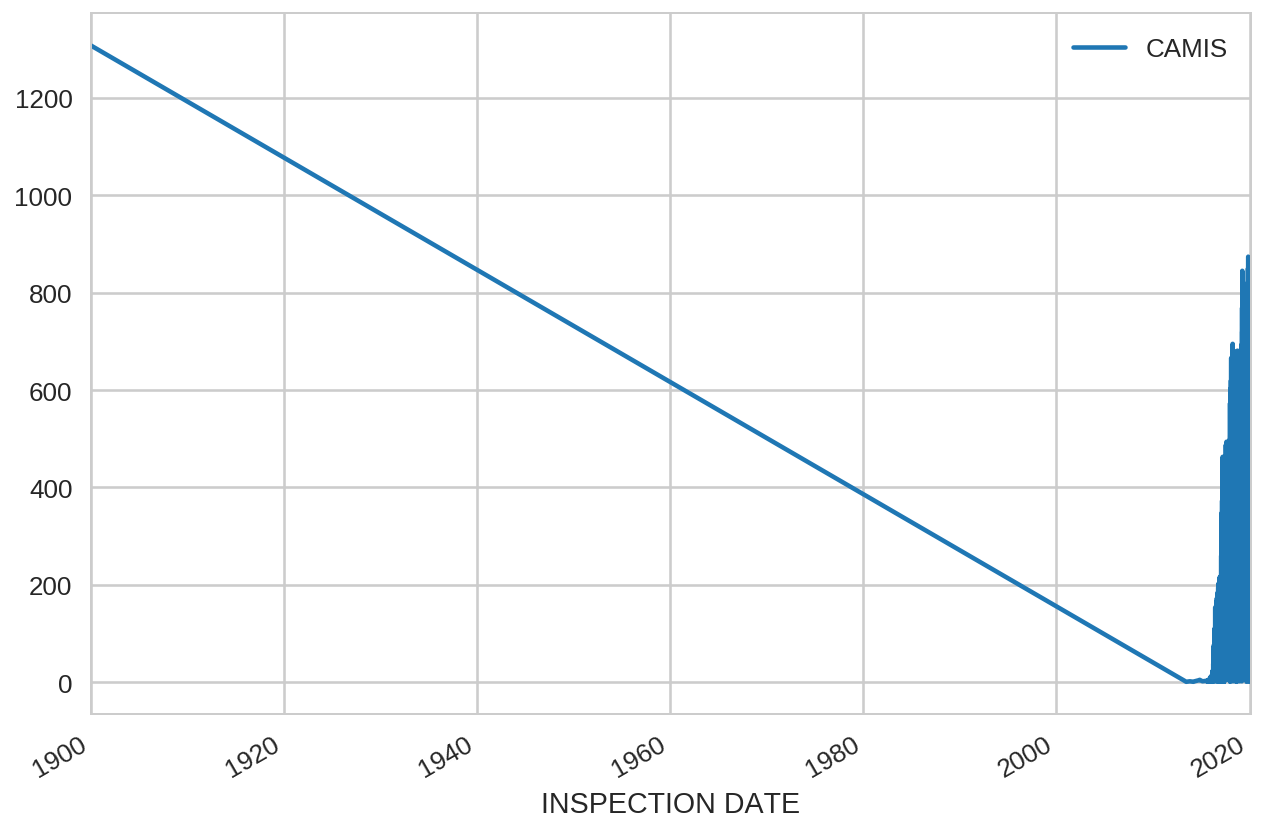

In [0]:
pivot.plot()

#### Deleting rows from a DataFrame

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis='index'` parameter means that we delete a **row** with that index value. (The `axis='columns'` means that we delete a column.). Often you will see `axis=0` (equivalent to `axis='index'`) and `axis=1` (equivalent to `axis='columns'`).
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [0]:
pivot.drop(pd.to_datetime('1900-01-01'), axis='index', inplace=True) 

In [0]:
pivot.head(5)

,CAMIS
INSPECTION DATE,
2013-06-07,1
2013-10-22,2
2014-03-06,1
2014-04-21,2
2014-09-13,4


And let's plot again.

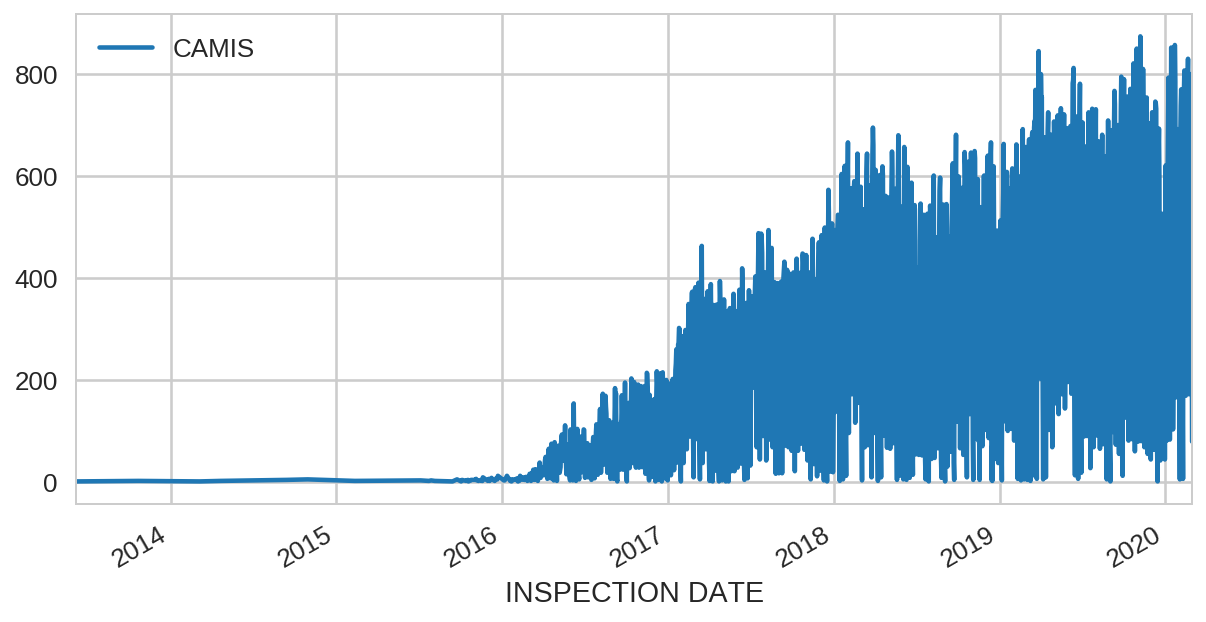

In [0]:
pivot.plot(figsize=(10,5))

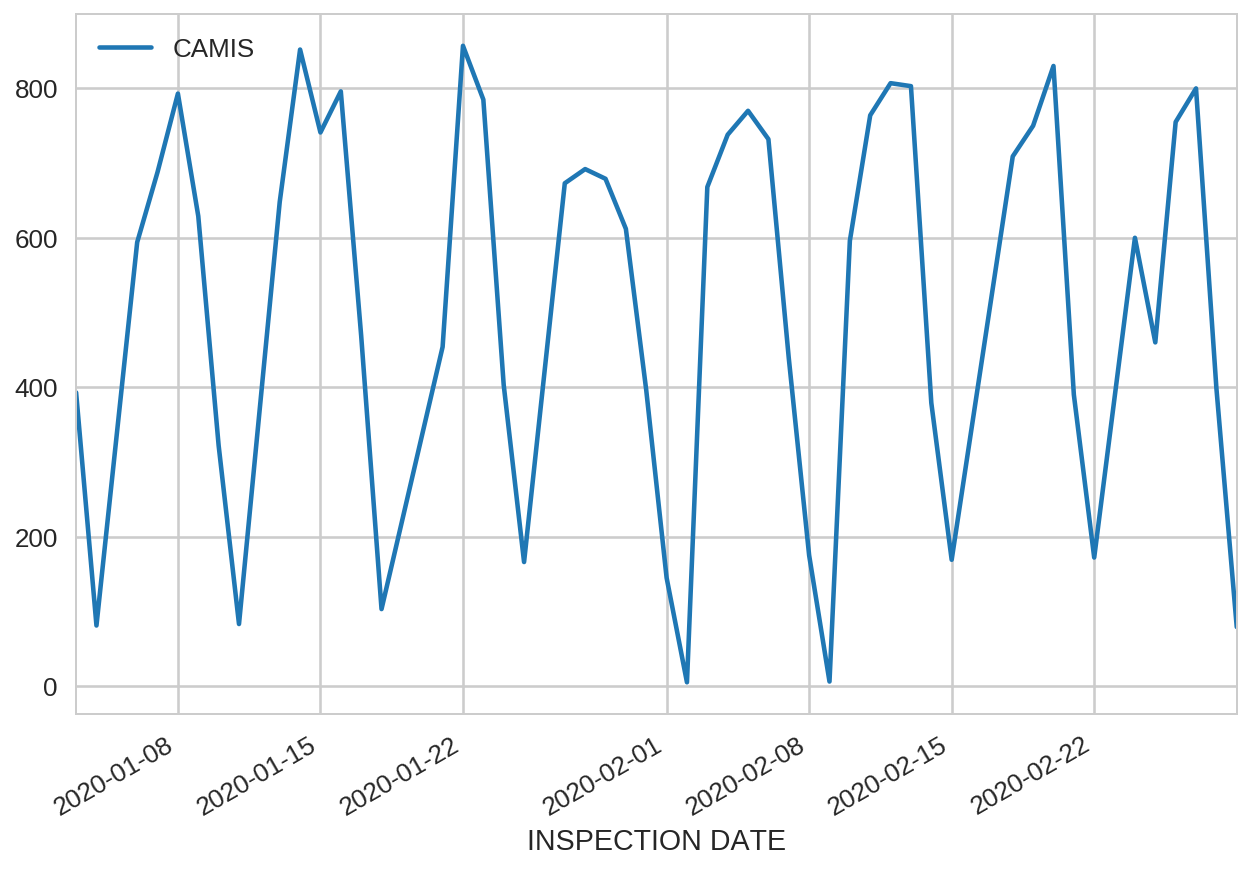

In [0]:
pivot.tail(50).plot()

#### Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [0]:
pivot.resample('1W').mean().tail(10)

,CAMIS
INSPECTION DATE,
2019-12-29,319.600000
2020-01-05,293.600000
2020-01-12,518.166667
2020-01-19,601.500000
2020-01-26,533.000000
2020-02-02,457.428571
2020-02-09,504.000000
2020-02-16,586.333333
2020-02-23,570.200000


Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

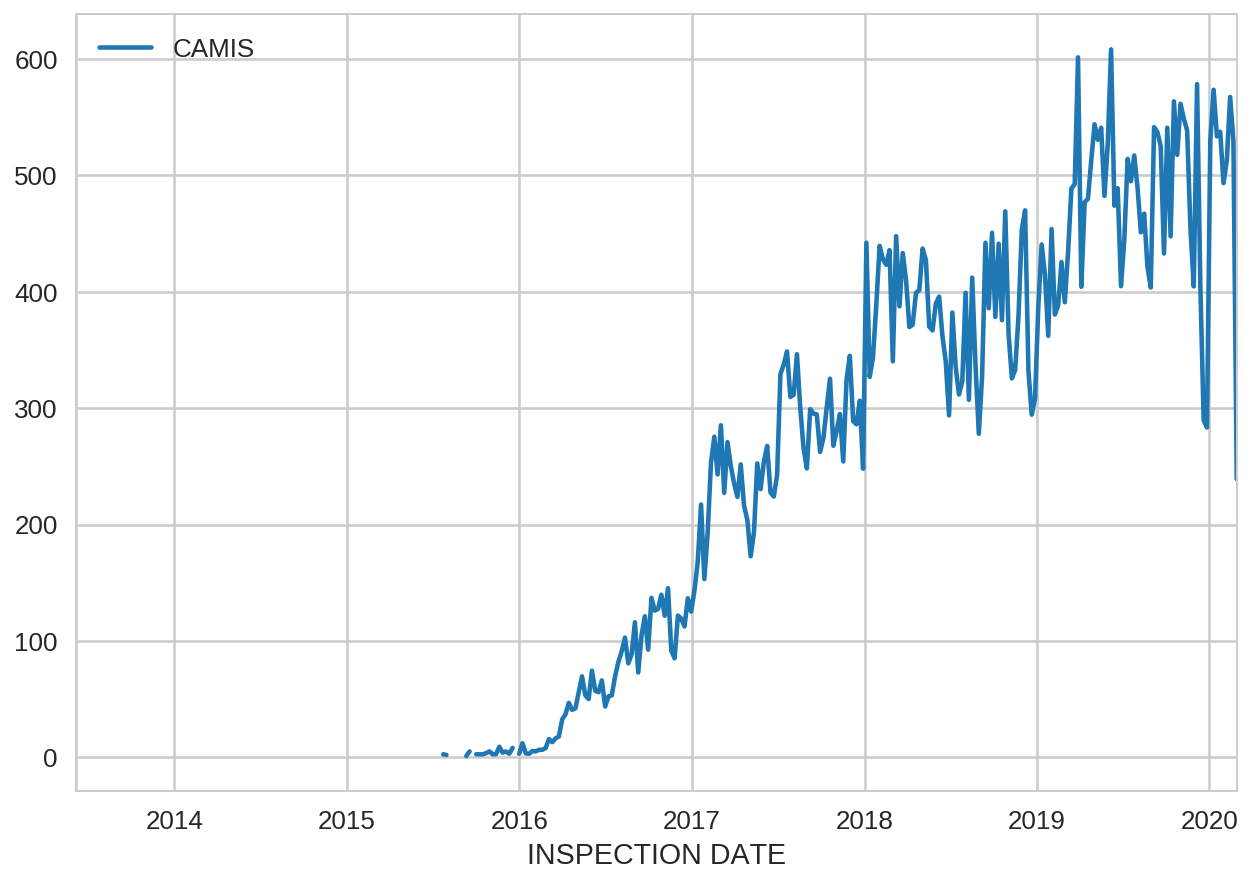

In [0]:
# Plot the average number of inspections, over 7-day periods
pivot.resample('7D').mean().plot()

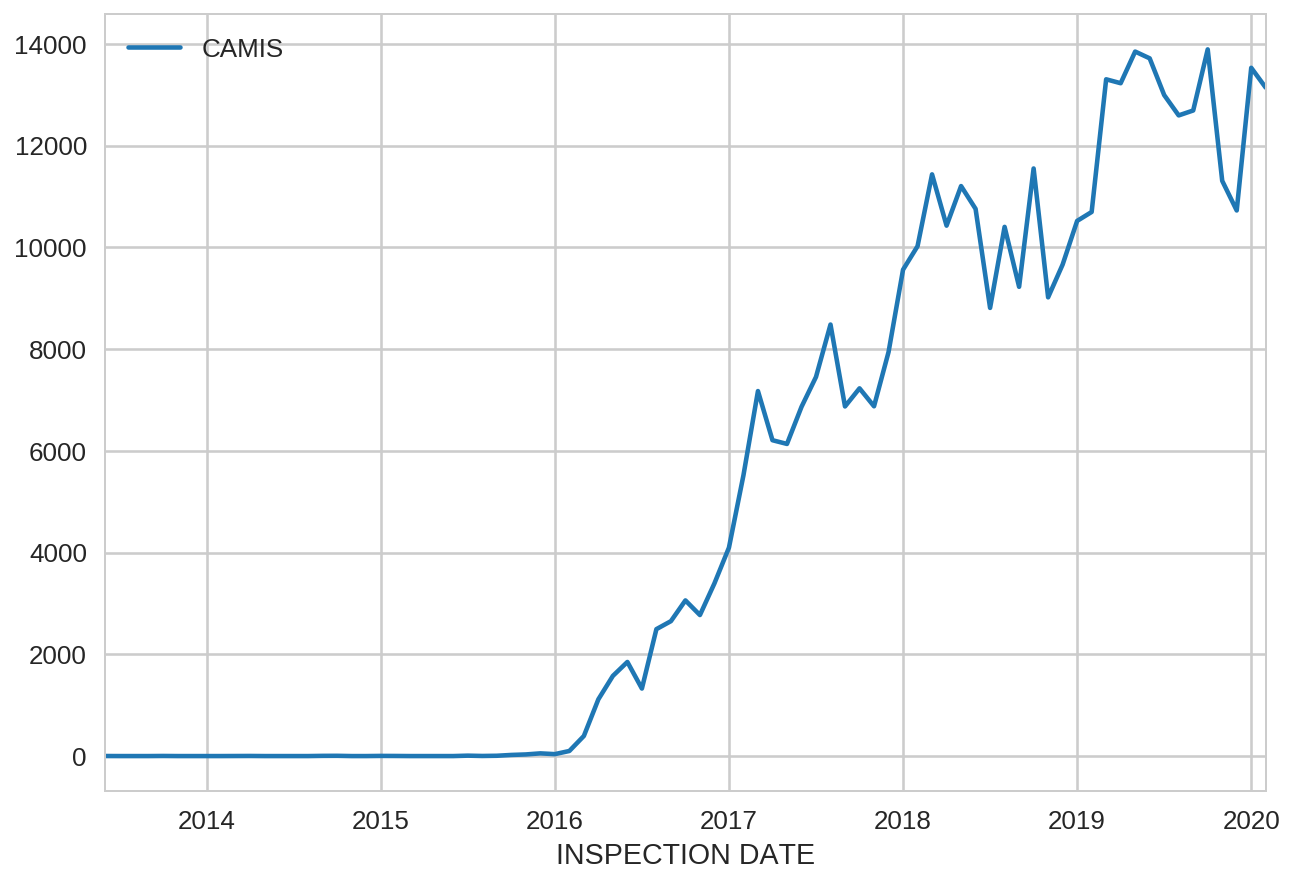

In [0]:
# Plot the total number of inspections, over 1-month periods
pivot.resample('1M').sum().plot()

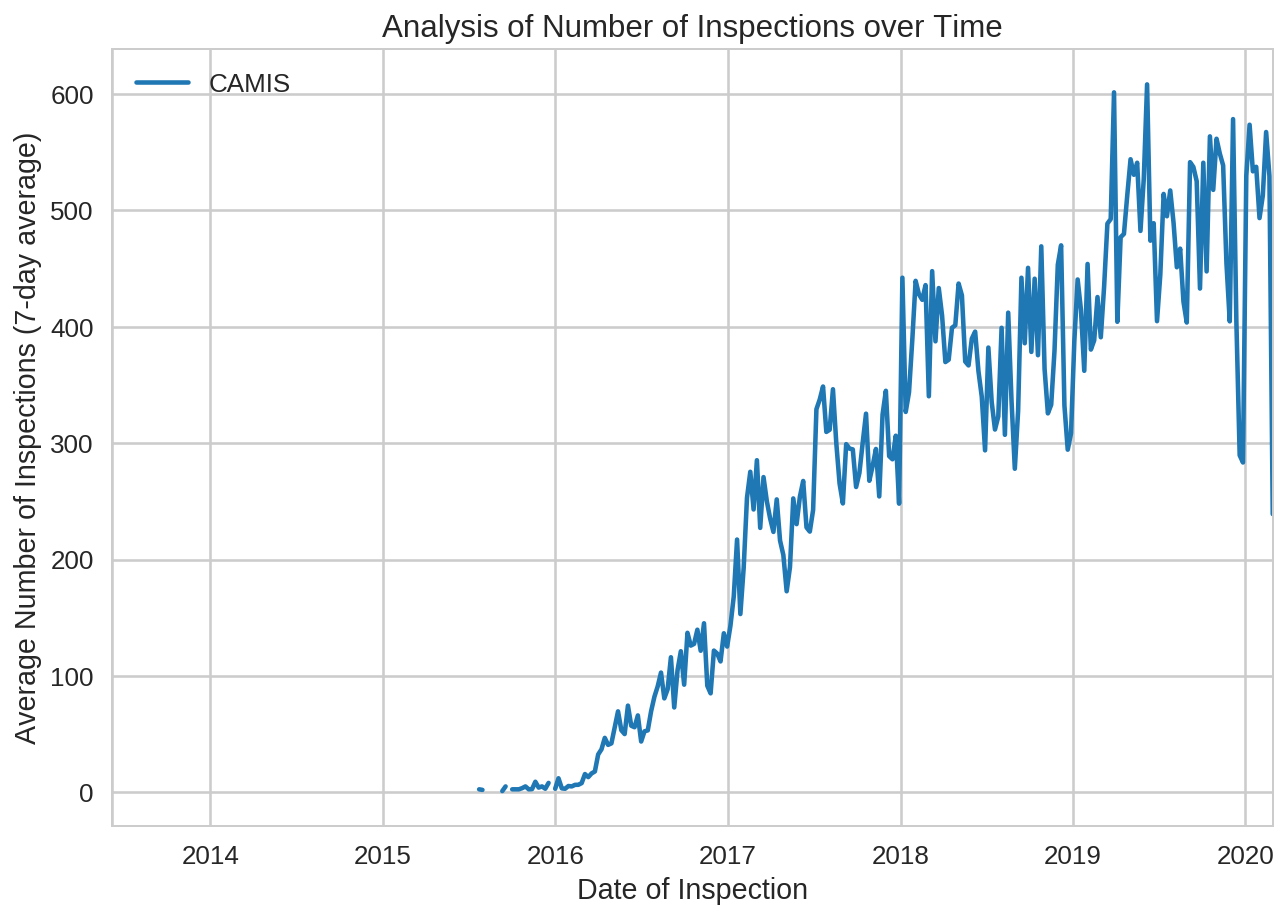

In [0]:
plot = pivot.resample('7D').mean().plot()
plot.set_xlabel("Date of Inspection")
plot.set_ylabel("Average Number of Inspections (7-day average)")
plot.set_title("Analysis of Number of Inspections over Time");

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [0]:
pivot2 = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)
pivot2.head(10)

BORO,0,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION DATE,,,,,,
1900-01-01,2.0,99.0,370.0,518.0,260.0,59.0
2013-06-07,NaN,NaN,NaN,1.0,NaN,NaN
2013-10-22,NaN,NaN,2.0,NaN,NaN,NaN
2014-03-06,NaN,NaN,1.0,NaN,NaN,NaN
2014-04-21,NaN,NaN,2.0,NaN,NaN,NaN
2014-09-13,NaN,NaN,4.0,NaN,NaN,NaN
2014-10-30,NaN,NaN,5.0,NaN,NaN,NaN
2015-01-07,NaN,3.0,NaN,NaN,NaN,NaN
2015-02-11,NaN,NaN,2.0,NaN,NaN,NaN


##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise. We can use the `drop` command of Pandas to drop these.

In [0]:
# The axis='index' (or axis=0) means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis='index') 

In [0]:
pivot2.tail(5)

BORO,0,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION DATE,,,,,,
2020-02-25,NaN,61.0,115.0,199.0,75.0,10.0
2020-02-26,NaN,103.0,154.0,313.0,141.0,44.0
2020-02-27,NaN,66.0,107.0,351.0,254.0,22.0
2020-02-28,NaN,30.0,44.0,299.0,26.0,NaN
2020-02-29,NaN,3.0,12.0,6.0,58.0,NaN


In [0]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample('1M').mean().tail(10)

BORO,0,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION DATE,,,,,,
2019-05-31,4.0,49.346154,142.153846,199.615385,129.423077,15.550000
2019-06-30,2.0,50.708333,128.821429,211.961538,99.464286,28.285714
2019-07-31,NaN,59.619048,135.423077,196.640000,113.653846,17.500000
2019-08-31,NaN,52.041667,113.714286,187.115385,108.481481,18.350000
2019-09-30,NaN,53.681818,126.769231,223.545455,121.958333,18.450000
2019-10-31,NaN,56.739130,136.461538,207.038462,125.538462,23.058824
2019-11-30,NaN,55.055556,129.391304,214.050000,122.913043,16.642857
2019-12-31,2.0,44.857143,103.120000,217.250000,109.080000,7.277778
2020-01-31,NaN,49.090909,155.080000,224.173913,132.125000,14.470588


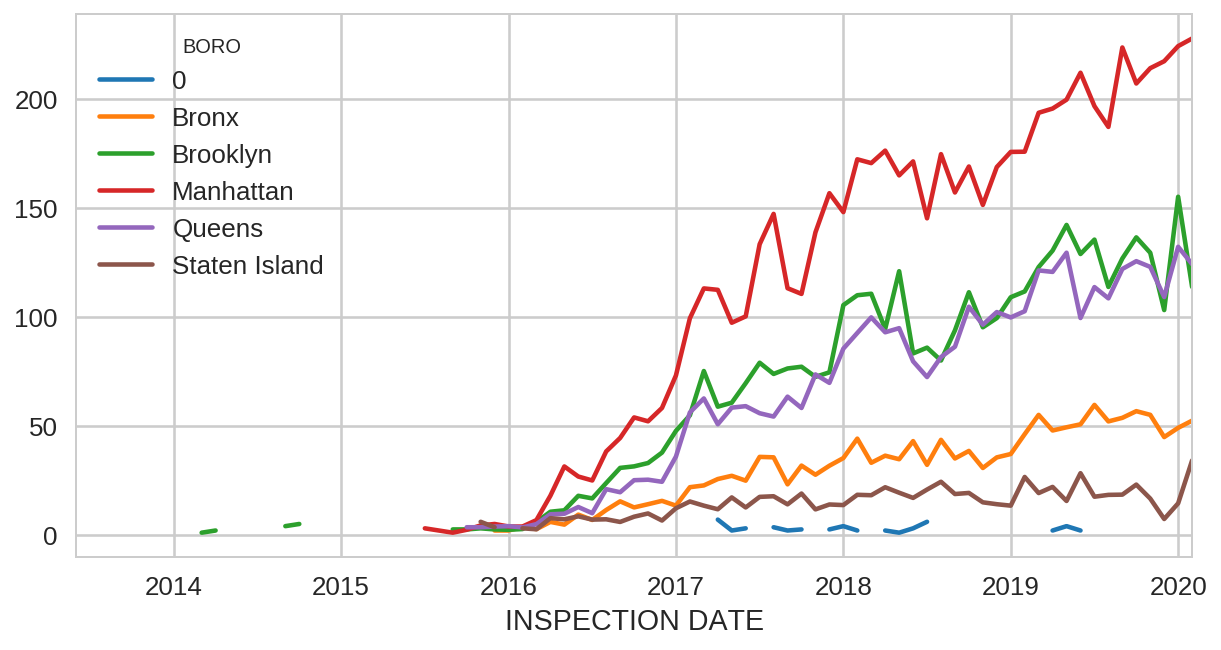

In [0]:
# If we plot a dataframe then by default the index column
# in our case the INSPECTION DATE becomes the x-asis
# and all the columns become separate lines in the plot
pivot2.resample('1M').mean().plot(figsize=(10,5))

# Potential Exercise, if we have time: 
# Drop the last date, which corresponds to an incomplete month